### Домашнее задание к лекции 2
1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

In [2]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

Отмасштабируем получившиеся признаки методом стандартизации.

In [3]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [4]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Обучим линейную регрессию путем градиентного спуска и получим графики изменения весов и ошибки

In [5]:
def gradient_descent(X, Y, w):
    # список векторов весов после каждой итерации
    w_list = [w.copy()]

    # список значений ошибок после каждой итерации
    errors = []

    # шаг градиентного спуска
    eta = 0.01

    # максимальное число итераций
    max_iter = 1e4

    # критерий сходимости (разница весов, при которой алгоритм останавливается)
    min_weight_dist = 1e-8

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    # счетчик итераций
    iter_num = 0

    # ход градиентного спуска
    pbar = tqdm(total = max_iter+1)
    while weight_dist > min_weight_dist and iter_num < max_iter:
        new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mserror(X, new_w, Y))
        iter_num += 1
        w = new_w
        pbar.update(1)
    pbar.close()
    w_list = np.array(w_list)

    print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
    
    return w_list, errors

In [6]:
# возьмем нулевые начальные веса
n_features = 2
w = np.zeros(n_features)
w_list = gradient_descent(data, target, w)

 10%|███████▏                                                                  | 965/10001.0 [00:00<00:02, 3247.89it/s]

В случае использования градиентного спуска функционал ошибки составляет 38.5683


Далее реализуем сам стохастический градиентный спуск.

In [7]:
def stochastic_gradient_descent(X, Y, w, eta = 0.01, max_iter = 1e5, min_weight_dist = 1e-8):
    # инициализируем начальный вектор весов
    w = np.zeros(2)

    # список векторов весов после каждой итерации
    w_list = [w.copy()]

    # список значений ошибок после каждой итерации
    errors = []

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    # счетчик итераций
    iter_num = 0

    np.random.seed(1234)

    # ход градиентного спуска
    pbar = tqdm(total = max_iter+1)
    while weight_dist > min_weight_dist and iter_num < max_iter:

        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(data.shape[0])

        new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mserror(data, new_w, target))

        iter_num += 1
        w = new_w
        pbar.update(1)
    pbar.close()
    w_list = np.array(w_list)

    print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
    return w_list, errors

In [8]:
# возьмем нулевые начальные веса
n_features = 2
w = np.zeros(n_features)
w_list_stochastic = stochastic_gradient_descent(data, target, w, eta = 0.01, max_iter = 1e5, min_weight_dist = 1e-8)

 92%|█████████████████████████████████████████████████████████████████▌     | 92374/100001.0 [00:23<00:01, 3940.86it/s]


В случае использования стохастического градиентного спуска функционал ошибки составляет 248.3494


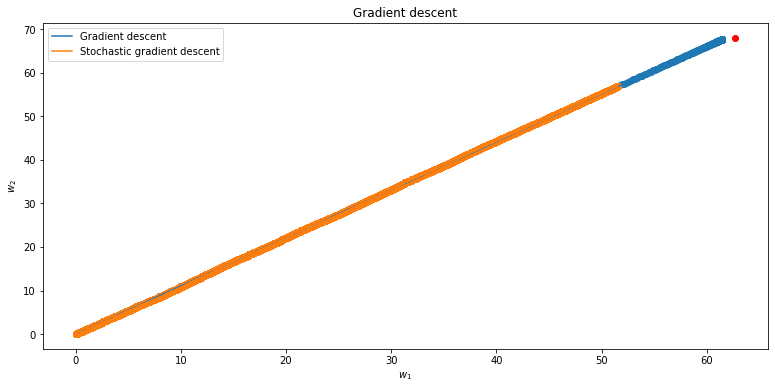

In [9]:
w_true = coef
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[0][:, 0], w_list[0][:, 1])
plt.scatter(w_list_stochastic[0][:, 0], w_list_stochastic[0][:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[0][:, 0], w_list[0][:, 1], label="Gradient descent")
plt.plot(w_list_stochastic[0][:, 0], w_list_stochastic[0][:, 1], label="Stochastic gradient descent")
plt.legend()
plt.show()

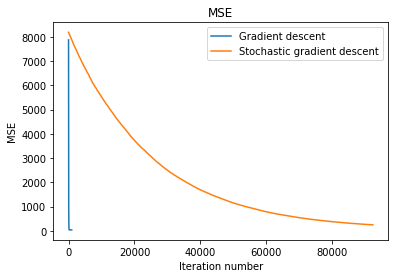

In [10]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(w_list[1])), w_list[1], label="Gradient descent")
plt.plot(range(len(w_list_stochastic[1])), w_list_stochastic[1], label="Stochastic gradient descent")
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

Скорость сходимости у обычного градиентного спуска больше

Модифицировать решение первого задания путем добавления 
 L2-регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [11]:
def stochastic_gradient_descent_weighted(X, Y, w, eta = 0.01, max_iter = 1e5, min_weight_dist = 1e-8, lambda_=1e-8):
    # инициализируем начальный вектор весов
    w = np.zeros(2)

    # список векторов весов после каждой итерации
    w_list = [w.copy()]

    # список значений ошибок после каждой итерации
    errors = []

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    # счетчик итераций
    iter_num = 0

    np.random.seed(1234)

    # ход градиентного спуска
    pbar = tqdm(total = max_iter+1)
    while weight_dist > min_weight_dist and iter_num < max_iter:

        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(data.shape[0])

        new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0] + lambda_ * w

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mserror(data, new_w, target))

        iter_num += 1
        w = new_w
        pbar.update(1)
    pbar.close()
    w_list = np.array(w_list)

    print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')
    return w_list, errors

In [12]:
# возьмем нулевые начальные веса
n_features = 2
w = np.zeros(n_features)
w_list_stochastic_weighted = stochastic_gradient_descent_weighted(data, target, w, eta = 0.01, max_iter = 1e5, min_weight_dist = 1e-8, lambda_=1e-8)

100%|█████████████████████████████████████████████████████████████████████▉| 100000/100001.0 [00:26<00:00, 3773.84it/s]


В случае использования стохастического градиентного спуска функционал ошибки составляет 193.1829


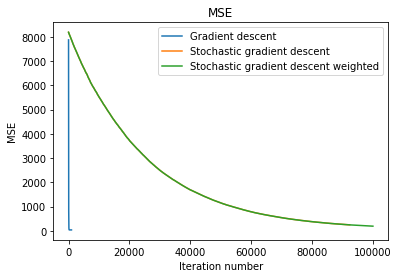

In [13]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(w_list[1])), w_list[1], label="Gradient descent")
plt.plot(range(len(w_list_stochastic[1])), w_list_stochastic[1], label="Stochastic gradient descent")
plt.plot(range(len(w_list_stochastic_weighted[1])), w_list_stochastic_weighted[1], label="Stochastic gradient descent weighted")
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

Как видим точность стохастического градиентного спуска с регуляризацией L2 точнее по сравнению с стохастическим градиентным спуском без регуляризации. Кроме того регуляризация позводила отфильтровать большие веса, за счет чего повысилась точность модели. Но скорость модели несколько замедлилась.